# P&D ISSP 2023 - Base notebook
@Students: You are free to edit anything you want.

Packages

In [1]:
import os
import matplotlib
import package.general as genfcns
import package.gui_utils as guifcns
matplotlib.style.use('default')  # <-- for notebooks: white figures background

# Root path (path to where you are storing this very notebook)
ROOTPATH = 'your/path/to/this/notebook'  #  /!/  Adapt this to your system  /!/ 
pathToSoundFiles = f'{ROOTPATH}/sound_files/'

# Parameters (examples)
speechfilenames = [
    pathToSoundFiles + 'speech1.wav',
    pathToSoundFiles + 'speech2.wav'
]
noisefilenames = [
    pathToSoundFiles + 'Babble_noise1.wav'
]
signalDuration = 10     # [s]

Build acoustic scenario and generate RIRs using GUI

In [2]:
# Launch GUI
guifcns.RIRg_GUI(
    exportFolder=f'{os.getcwd()}/rirs',
    outputRIRplot=False,
    distBwMics=10,  # [cm]
    fs=44100,
    t60=0,
    theme='SystemDefault',
)

Note that the RIRs are sampled at 44100 Hz.
PyRoomAcoustics is computing the 30 RIRs...
RIRs computed successfully. Saving as Pickle archive.
RIRs saved in file: "rirs_20250116_120421.pkl.gz", in folder
"c:\Users\pdidier\Dropbox\_BELGIUM\KUL\Supervision\Teaching Assistance\PandD_ISSP\2025\python\panddissp-base\rirs"
You may close the GUI if not needed anymore!


Acoustic scenario object containing the RIRs, with parameters:
>> Field "audioCoords": [[2.8499999999999996, 3.4499999999999997], [2.725, 2.15]]
>> Field "audioIds": ['20', '21']
>> Field "c": 340
>> Field "distBwMics": 0.1
>> Field "exportFolder": c:\Users\pdidier\Dropbox\_BELGIUM\KUL\Supervision\Teaching Assistance\PandD_ISSP\2025\python\panddissp-base/rirs
>> Field "fs": 44100
>> Field "lineIds": [1, 3, 4, 6, 8, 10, 12, 14, 16, 18]
>> Field "lineTextIds": [2, 5, 7, 9, 11, 13, 15, 17, 19]
>> Field "micCoords": [[3.4000000000000004, 2.6750000000000003], [3.4000000000000004, 2.7750000000000004], [3.4000000000000004, 2.875], [3.4000000000000004, 2.9749999999999996], [3.4000000000000004, 3.075], [0.7000000000000001, 3.3000000000000003], [0.7000000000000001, 3.4000000000000004], [0.7000000000000001, 3.5], [0.7000000000000001, 3.5999999999999996], [0.7000000000000001, 3.7]]
>> Field "micsIds": ['22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
>> Field "nMicsPerArray": 5
>> Field

RIRs selection

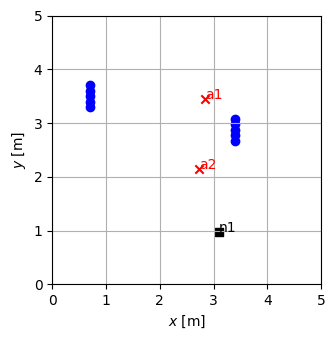

In [3]:
# Select RIRs to be used
# rirFile = 'rirs/'  # use this to input a specific set of RIRs (full path to .pkl.gz file)
rirFile = genfcns.select_latest_rir(path='./rirs/')  # use this to select the lastly generated RIRs
# Load from Pickle archive
acousticScenario = guifcns.load_rirs(path=rirFile)
# >>> NB: the RIRs can be accessed as acousticScenario.RIRsAudio /or/ RIRsNoise
acousticScenario.plot_asc()  # show the acoustic scenario as a plot

In [ ]:
# Up to you now! ...

# Signal processing - Week 2: MUSIC algorithm

Computing DOAs via freq.-domain MUSIC algorithm...
All estimated DOAs: [0. 0. 0.]
Selected estimated DOAs: [0. 0.]
Ground truth DOAs: [-108.17  -33.05]
Estimate error(s): [108.17  33.05] deg.


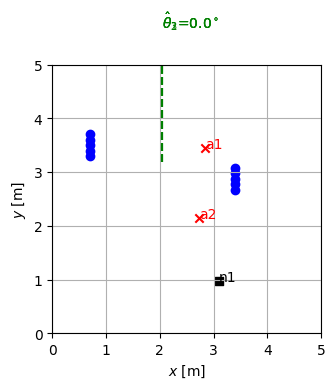

In [4]:
import numpy as np

winLength = 1024 # Window length
nSources = acousticScenario.RIRsAudio.shape[-1] +\
    acousticScenario.RIRsNoise.shape[-1] # Number of sources
theta = np.arange(0, np.pi, step=np.pi / 360)  # angles to consider

print('Computing DOAs via freq.-domain MUSIC algorithm...')


# DOAestAll = yourMUSIC() ...
DOAestAll = np.zeros(nSources)  # default


print(f'All estimated DOAs: {DOAestAll * 180 / np.pi}')

# ------------------ DOA estimation performance check ------------------
# Automatic selection of the target DOA
DOAest, groundTruthDOAtalkers = genfcns.auto_choice_doa(
    DOAestAll, acousticScenario
)
print(f'Selected estimated DOAs: {np.round(DOAest * 180 / np.pi, 2)}')
print(f'Ground truth DOAs: {np.round(groundTruthDOAtalkers * 180 / np.pi, 2)}')
# Check validity
genfcns.check_plot_tdoas(DOAest, DOAestAll, acousticScenario)
print(f'Estimate error(s): {np.round((DOAest - groundTruthDOAtalkers) * 180/np.pi, 2)} deg.')